In [2]:
!python3 ../Datasets/datasets.py

In [3]:
import sys
sys.path.append('../utils')
sys.path.append('../Datasets')
sys.path.append('../models')

AUD_DIR = '../../audioData/sythenticSoundscenes/train/'
CSV_DIR = '../Datasets/'

import audio_utils
import datasets
import os
import models
import torch
import pandas as pd
import numpy as np
import librosa
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim


In [4]:
csv_file = os.path.join(CSV_DIR, 'scrapper_train_dataset.csv')
scrapper_df = pd.read_csv(csv_file)

scrapper_dataset = datasets.scraperDataset(csv_file, AUD_DIR, only_scene=True)

In [11]:
trainloader = DataLoader(scrapper_dataset, batch_size=32, shuffle=True)

In [16]:
#random = torch.rand([1,40,1501])

device = 'cuda:3'
model = models.logmelAE_30secs()
model = model.to(device)

loss_fn = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [32]:
def train(epoch):
    print('\n Epoch: %d' % epoch)
    model.train()
    train_loss = 0

    for idx, inputs in enumerate(trainloader):
        model.train()
        inputs = inputs.to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = loss_fn(outputs, inputs)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        print(f'Epoch [{epoch+1}], Loss: {loss.item():.4f}')

In [34]:
epochs = 30
model = model.to(device)
for epoch in range(0,30):
    train(epoch)


 Epoch: 0
Epoch [1], Loss: 2.4978
Epoch [1], Loss: 2.5453
Epoch [1], Loss: 2.4972
Epoch [1], Loss: 2.5008
Epoch [1], Loss: 2.5201
Epoch [1], Loss: 2.4094
Epoch [1], Loss: 2.6156
Epoch [1], Loss: 2.4763
Epoch [1], Loss: 2.5159
Epoch [1], Loss: 2.4998
Epoch [1], Loss: 2.4875
Epoch [1], Loss: 2.4361
Epoch [1], Loss: 2.4640
Epoch [1], Loss: 2.5859
Epoch [1], Loss: 2.4158
Epoch [1], Loss: 2.5004
Epoch [1], Loss: 2.4792
Epoch [1], Loss: 2.4159
Epoch [1], Loss: 2.3715
Epoch [1], Loss: 2.4719
Epoch [1], Loss: 2.4719
Epoch [1], Loss: 2.4452
Epoch [1], Loss: 2.3349
Epoch [1], Loss: 2.5323
Epoch [1], Loss: 2.5837
Epoch [1], Loss: 2.5843
Epoch [1], Loss: 2.4344
Epoch [1], Loss: 2.5214
Epoch [1], Loss: 2.5477
Epoch [1], Loss: 2.5405
Epoch [1], Loss: 2.4614
Epoch [1], Loss: 2.4633
Epoch [1], Loss: 2.5098
Epoch [1], Loss: 2.4844
Epoch [1], Loss: 2.4072
Epoch [1], Loss: 2.4660
Epoch [1], Loss: 2.4491
Epoch [1], Loss: 2.4818
Epoch [1], Loss: 2.4796
Epoch [1], Loss: 2.4584
Epoch [1], Loss: 2.5274
Epoch

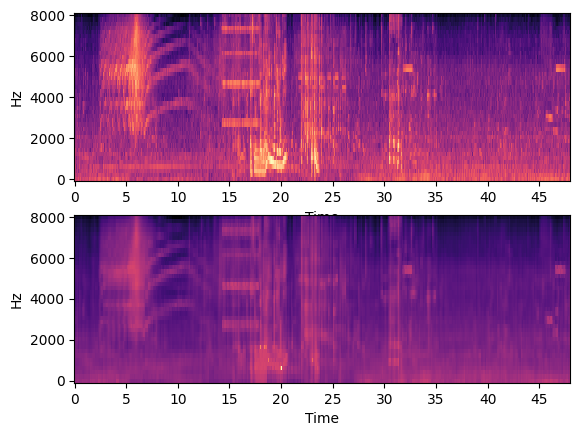

In [37]:
import librosa
import matplotlib.pyplot as plt

#rand = torch.rand([1,40,1501])
rand_aud = audio_utils.load_audio(os.path.join(AUD_DIR, scrapper_df['audio_fileNames'][96]))
rand = audio_utils.get_log_melSpectrogram(rand_aud)

model = model.cpu()
with torch.inference_mode():
    out = model(rand)

plt.subplot(2,1,1)
librosa.display.specshow(rand.squeeze().numpy(), x_axis='time', y_axis='linear', sr=16000)
plt.subplot(2,1,2)
librosa.display.specshow(out.squeeze().numpy(), x_axis='time', y_axis='linear', sr=16000)


In [55]:
import torchaudio
sam_file = os.path.join(AUD_DIR, scrapper_df['audio_fileNames'][0])

audio, sr = torchaudio.load(sam_file)
aud2 = audio_utils.load_audio(sam_file)
log_mel = audio_utils.get_log_melSpectrogram(aud2)

print(log_mel.shape)

kern = nn.Conv2d(1,5,3,2)
kern(log_mel).shape


torch.Size([1, 40, 1501])


torch.Size([5, 19, 750])

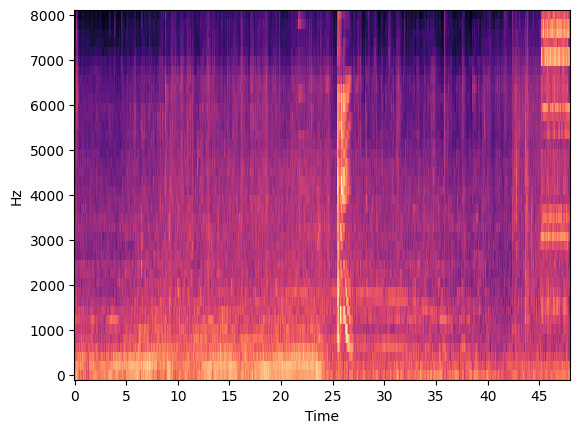

In [41]:
import librosa
import matplotlib.pyplot as plt

librosa.display.specshow(log_mel.squeeze().numpy(), x_axis="time", y_axis="linear", sr=16000)